# Announcements
- Notebook from Lecture 13 updated on D2L
- Please familiarize ourself with the term projects, and sign up for your (preliminary) choice using [this form](https://forms.gle/ByLLpsthrpjCcxG89). _You may revise your choice, but I'd recommend settling on a choice well before Thanksgiving._
- Recommended reading on ODEs: [Lecture notes by Prof. Hjorth-Jensen (University of Oslo)](https://www.asc.ohio-state.edu/physics/ntg/6810/readings/hjorth-jensen_notes2013_08.pdf)
- Problem Set 4 will be posted on D2L by 9/28.
- __Outlook__: Week of 9/28 will cover adaptive step size and symplectic ODE integrators, after that we'll start with PDEs 
- Conference for Undergraduate Women in Physics: online event in 2021, [applications accepted until 10/25](https://www.aps.org/programs/women/cuwip/)

## Summary: Solving systems of higher-order ODEs
### Step 1: Reduction to system of first-order ODEs
Any ordinary differential equation with a highest derivative
$d^ng/dy^n$ can always be expressed as a set of $n$ first-order
differential equations by introducing a set of auxiliary variables.

If we have an $n^{th}$-order ODE and we can solve for the $n^{th}$ derivative
$
  y^{(n)} = g(t, y, y', y'',\dots, y^{(n-1)})
$
and convert it to a system of $n$ first-order ODEs by defining auxiliary
variables $v_i$ as
\begin{align}
v_0 &= y\\
v_1 &= y'\\
& \vdots\\
v_{n-1} &= y^{(n-1)}\quad\quad\quad\quad\quad\quad
\end{align}
The resulting system of first-order ODEs is then
\begin{align}
  v'_0 &= v_1\\
  v'_1 &= v_2\\
  & \vdots\\
  v'_{n-1} &= g(t, v_0, v_1, v_2,\dots,v_{n-1})
\end{align}

__Example from Lecture 12: van der Pol oscillator__

$$ \frac{d^2 x}{dt^2} - a (1-x^2) \frac{dx}{dt} + x = 0 $$
We turned this into a pair of first-order ODEs by defining an auxiliary function $v(t) = dx/dt$ and writing the system as
\begin{align}
\frac{dx}{dt} &= v\\
\frac{dv}{dt} &= a (1-x^2) v - x
\end{align}

_Note that there are only functions (and the independent variable) on the RHS; all "differentials" are on the LHS._

### Step 2: Solve system of first-order ODEs
We can write the system of first-order ODEs in vector form as $\textbf{v}' = \textbf{g}(t,
\textbf{v})$, with $g_i(t, \textbf{v}) = v_i$ for $i<n-1$, and $g_{n-1}(t,
\textbf{v}) = g(t,v_0, v_1, v_2,\dots,v_{n-1})$.

Integration then proceeds (using your favorite integrator) by
taking a single step in all $n$ equations individually, taking care to
distinguish between the old and the new values of all variables.

See notebooks from Lectures 12 and 13 for worked examples.


# Exercise: The damped Pendulum
adapted from lecture notes by Phil Pinto, and notebooks by Jonas Tjemsland, Eilif Sommer Øyre and Jon Andreas Støvneng.
## The simple Pendulum
We will first discuss the *simple pendulum* which is a simple and idealised model of the real pendulum. It consists of a point mass $m$ suspended by an unstretchable, massless string (or rod) of length $l$. The pendulum only moves in one plane and there is no friction. Let $\theta$ denote the angle between the vertical axis and the string, such that $\theta=0$ at equilibrium. Note that the position of the pendulum can be specified using only $\theta$. If we pull the mass to one side and let it go, it will start to to oscillate around the equilibrium, similar to a wrecking ball.

There are two forces acting on the mass: the gravitaional force $\mathbf{F} = m\mathbf{g}$ and the pull from the string $\mathbf{S}$. The forces can be decomposed into a direction along the string (radial direction, $\hat r$) and a direction along the path of the point mass (azimuthal direction, $\hat \theta$). Since the string is assumed to be unstretchable, only the gravitational pull in the azimuthal direction, $\mathbf F_\theta$, will contribute to the motion of the pendulum. The gravitational force in the radial direction, $\mathbf F_r$, is cancelled by the pull from the string: $\mathbf F_r = - \mathbf{S}$. Henceis clear that
\begin{equation}
F_\theta = -mg\sin\theta.
\end{equation}

We can now use Newton's second law, $\mathbf{F}=m\mathbf{a}$, to find an differential equation describing the motion of the pendulum. Let $t$ denote the time. The acceleration of the point mass can be expressed by
\begin{equation}
\mathbf{a} = \frac{\mathrm{d}^2\theta}{\mathrm{d} t^2}\;\hat \theta = l\ddot \theta\;\hat \theta.
\end{equation}
The motion of the pendulum is thus described by the equation
\begin{equation}\label{simplependODE}\tag{1}
\ddot \theta = \frac{\mathrm{d}^2\theta}{\mathrm{d} t^2} = -\frac{g}{l}\sin\theta = -\omega_0^2\sin\theta.
\end{equation}
where $\omega_0 = \sqrt{g/l}$ is the _natural frequency_ of the pendulum. 

__For the rest of this
discussion, we will scale the units of time so that $\omega_0=1$__. 

### Analytical Approximation
Equation (\ref{simplependODE}) cannot be solved analytically. However, note that $\sin\theta\approx \theta$ for $\theta \ll 1$. Thus, for small angles, the motion can be approximated by
\begin{equation}
\ddot \theta \approx -\omega_0\theta,
\end{equation}
which has the simple solution
\begin{equation}
\theta=\theta_0\cos(\omega_0 t),
\end{equation}
where $\theta_0$ is the initial posision at time $t=0$. This is known as a harmonic oscillation. The period of the oscillation is $T=2\pi/\omega_0=2\pi\sqrt{l/g}$.

An implementation of the analytic approximation `simple_pendulum_approx` is provided below.

### Numerical Solution
<span style="color:blue"> Introduce the angular velocity $\omega = \frac{d\theta}{d t}$ and rewrite Equation (\ref{simplependODE}) into a system of two coupled first-order ODEs, and complete the function `simple_pendulum_RHS` that provides an expression for the right hand side of this system of linear ODES. </span>

<span style="color:blue"> Then set up our function `odeSolve(t0, y0, tmax, h, RHS, method, *P)` (copied below) to solve this system of ODEs. Plot the numerical solution (angle) for the pedulum starting _at rest_ at two different initial angles $\theta_0=\{15^\circ, 60^\circ\}=\{\pi/6, \pi/3\}$ over the time interval $[0,10]$ and compare with the analytical approximation.</span>

### Solution
\begin{equation}
  \begin{split}
    \frac{d\theta}{dt} &= \omega\\
    \frac{d\omega}{dt} &= -\sin(\theta)
  \end{split}
\end{equation}



In [1]:
#import standard libraries

import numpy as np
import matplotlib.pyplot as plt 
def simple_pendulum_approx(t, theta0):
    """ Evaluates the analytical approximation. """
    return theta0*np.cos(t)

# YOUR TURN!
def simple_pendulum_RHS(t,y,*P):
    """ Return the right hand side of the 
    ordinary differential equation describing
    a simple pendulum.
    We store our function as the array y=[theta,omega]
    """
    return np.array([y[1],-np.sin(y[0])])
    

In [2]:
# code copied from Lecture 12/13
# you don't need to change anything in this cell
def RK4_step(t, y, h, g, *P):
    """
    Implements a single step of a fourth-order, explicit Runge-Kutta scheme
    """
    thalf = t + 0.5*h
    k1 = h * g(t, y, *P)
    k2 = h * g(thalf, y + 0.5*k1, *P)
    k3 = h * g(thalf, y + 0.5*k2, *P)
    k4 = h * g(t + h, y + k3, *P)
    return y + (k1 + 2*k2 + 2*k3 + k4)/6
def odeSolve(t0, y0, tmax, h, RHS, method, *P):
    """
    ODE driver with constant step-size, allowing systems of ODE's
    """
    # make array of times and find length of array
    t = np.arange(t0,tmax+h,h)
    ntimes,  = t.shape

    # find out if we are solving a scalar ODE or a system of ODEs, and allocate space accordingly
    
    if type(y0) in [int, float]:  # check if primitive type -- means only one eqn
        neqn = 1
        y = np.zeros( ntimes )
    else:                         # otherwise assume a numpy array -- a system of more than one eqn
        neqn, = y0.shape
        y = np.zeros( (ntimes, neqn) )

    # set first element of solution to initial conditions (possibly a vector) 
    y[0] = y0

    # march on...
    for i in range(0,ntimes-1):
        y[i+1] = method(t[i], y[i], h, RHS, *P)

    return t,y

In [3]:
#two different initial conditions
theta01 = np.pi/12
theta02 = np.pi/3
t0 = 0
tmax = 10
#choose a time step
h = 0.1
#obtain t, y1 for the starting point theta01
t,y1 = odeSolve(t0,np.array([theta01,0]),tmax,h,simple_pendulum_RHS,RK4_step,0)

#obtain t, y2 for the starting point theta01
t,y2 = odeSolve(t0,np.array([theta02,0]),tmax,h,simple_pendulum_RHS,RK4_step,0)


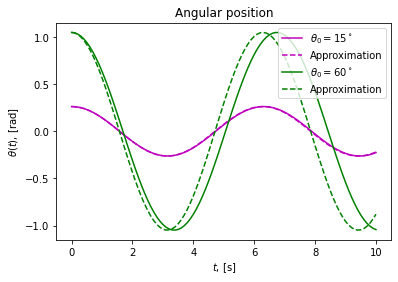

In [6]:
plt.title("Angular position")
#plot t, theta obtained numerically from initial condition theta01
plt.plot(t, y1[:,0], "m", label=r"$\theta_0=%.0f^\circ$"%(theta01*180/np.pi))
#plot t, approximated theta for initial condition theta01
plt.plot(t, simple_pendulum_approx(t, theta01), "m--", label=r"Approximation")
#plot t, theta obtained numerically from initial condition theta02
plt.plot(t, y2[:,0], "g", label=r"$\theta_0=%.0f^\circ$"%(theta02*180/np.pi))
#plot t, approximated theta for initial condition theta02
plt.plot(t, simple_pendulum_approx(t, theta02), "g--", label=r"Approximation")
plt.xlabel(r"$t$, [s]")
plt.ylabel(r"$\theta(t)$, [rad]")
plt.legend()
plt.show()


### Conservation of Energy

The total mechanical energy,
\begin{equation}
E = T + U =  \frac{1}{2} m l^2 \dot\theta^2 +g m l(1- \cos(\theta)),
\end{equation}
should be conserved. It thus serves as an excellent way to check if the time step used above was sufficiently small. 
In our rescaled units, 
\begin{equation}
\tilde{E} = \tilde{T} + \tilde{U} = \frac{1}{2}\dot \theta^2 +(1-\cos(\theta))
\end{equation}
<span style="color:blue"> Let's plot the kinetic, potential and total energy (per unit mass) for the largest initial angle. If total energy is conserved, increase the step size until it isn't; if total energy is not conserved, decrease the step size until it is.</span>

In [56]:
def get_U(y):
    """ Computes the potential energy from coordinate vector [y]. """
    return 1- np.cos(y[:,0])

def get_T(y):
    """ Computes the kinetic energy from coordinate vector [y]. """
    return 0.5*y[:,1]**2

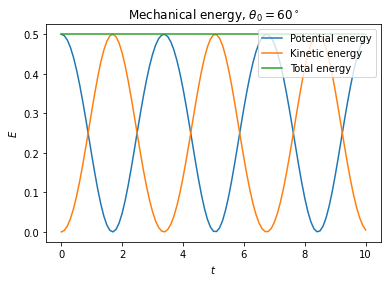

In [58]:
plt.figure()
plt.title(r"Mechanical energy, $\theta_0=%.0f^\circ$"%(theta02*180/np.pi))
plt.plot(t, get_U(y2), label=r"Potential energy")
plt.plot(t, get_T(y2), label=r"Kinetic energy")
plt.plot(t, get_U(y2) + get_T(y2), label=r"Total energy")
plt.xlabel(r"$t$")
plt.ylabel(r"$E$")
plt.legend(loc=1)
plt.show()

## The damped Pendulum

A real pendulum cannot oscillate forever. Due to friction, the pendulum will eventually slow down and stop. At low velocities, the air resistance is proportional to the velocity, $f = -b\dot \theta$ . The differential equation describing this pendulum is described by
\begin{equation}
\ddot \theta = -\underbrace{\frac{b}{m l}}_{Q}\dot \theta - \omega_0^2\sin\theta,
\label{diff_damped}\tag{2}
\end{equation}
where we have introduced another proportionality constant $Q$.
As before, the equation has an analytical solution for $\theta \ll 1$, which you can obtain using standard techniques.

<span style="color:blue"> Recast Equation (\ref{diff_damped}) into a system of two coupled first-order ODEs, and modify the function `simple_pendulum_RHS` from above into `damped_pendulum_RHS`, an expression for the right hand side of this system of linear ODES. </span>
<span style="color:blue"> Choose some value for $Q$, solve the damped pendulum for $\theta_0 = 60^\circ$, and plot the result. </span>

<span style="color:blue"> What happens to conservation of energy? </span>

### Solution
\begin{equation}
  \begin{split}
    \frac{d\omega}{dt} &= -Q\omega-\sin(\theta) \\
    \frac{d\theta}{dt} &= \omega
  \end{split}
\end{equation}


In [93]:
# YOUR TURN!
def damped_pendulum_RHS(t,y,*P):
    """ Return the right hand side of the 
    ordinary differential equation describing
    a simple pendulum.
    We store our function as the array y=[theta,omega]
    """
    #unpack parameters
    Q,= P
    return np.array([y[1],-np.sin(y[0])-Q*y[1]])
    

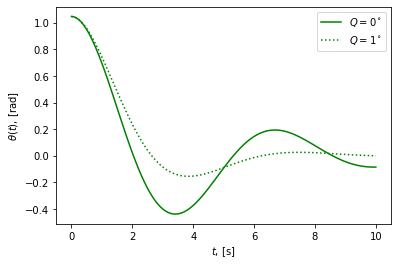

In [99]:
#initial conditions
theta02 = np.pi/3
t0 = 0
tmax = 10
#choose a time step
h = 0.1
Q1 = .5
Q2 = 1.0

#obtain t, y2_damped for the starting point theta02, Q value Q1
t,y2_damped = odeSolve(t0,np.array([theta02,0]),tmax,h,damped_pendulum_RHS,RK4_step,Q1)
plt.plot(t, y2_damped[:,0], "g", label=r"$Q=%.0f^\circ$"%(Q1))
#obtain t, y2_damped for the starting point theta02, Q value Q2
t,y2_damped = odeSolve(t0,np.array([theta02,0]),tmax,h,damped_pendulum_RHS,RK4_step,Q2)
plt.plot(t, y2_damped[:,0], "g", linestyle =":",label=r"$Q=%.0f^\circ$"%(Q2))
plt.xlabel(r"$t$, [s]")
plt.ylabel(r"$\theta(t)$, [rad]")
plt.legend()
plt.show()
plt.show()

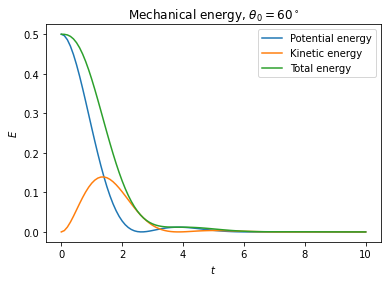

In [98]:
plt.figure()
plt.title(r"Mechanical energy, $\theta_0=%.0f^\circ$"%(theta02*180/np.pi))
plt.plot(t, get_U(y2_damped), label=r"Potential energy")
plt.plot(t, get_T(y2_damped), label=r"Kinetic energy")
plt.plot(t, get_U(y2_damped) + get_T(y2_damped), label=r"Total energy")
plt.xlabel(r"$t$")
plt.ylabel(r"$E$")
plt.legend(loc=1)
plt.show()

Over time, the energy of the pendulum system gets dissipated!